# Summaries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

all_ns = [200, 500, 1000, 10000, 50000]
all_sds = [1, 2, 5, 10]

select_ns = [200]
select_sds = [1]

train_summaries_dfs = {}
validation_summaries_dfs = {}
for n in all_ns:
    for sd in all_sds:
        
#         if n not in select_ns or sd not in select_sds:
#             continue
            
        train_filename = f'train_summary_sd_{sd}_n_{n}.csv'
        train_df = pd.read_csv(train_filename, index_col=0)
        train_df['n'] = n
        train_df['sd'] = sd

        validation_filename = f'validation_summary_sd_{sd}_n_{n}.csv'
        validation_df = pd.read_csv(validation_filename, index_col=0)
        validation_df['n'] = n
        validation_df['sd'] = sd
        
        train_summaries_dfs[f'n:{n}, sd:{sd}'] = train_df
        validation_summaries_dfs[f'n:{n}, sd:{sd}'] = validation_df

In [3]:
train_summaries_dfs['n:200, sd:1']

,Abs % Error of ATE,MSE,KL Divergence,n,sd
Actuals,0.000000,0.000000,0.000000,200,1
S Learner (LR),0.635626,0.145718,3.747472,200,1
S Learner (XGB),0.555228,0.759833,1.255018,200,1
S Learner (SVR),0.762823,0.295662,1.258239,200,1
S Learner (Bagging_SVR),0.743113,0.282468,1.601537,200,1
S Learner (Adaboost_SVR),0.536758,0.265786,1.099441,200,1
S Learner (Adaboost_MLP),0.513985,0.089536,1.242091,200,1
T Learner (LR),0.594935,0.156094,1.165304,200,1
T Learner (XGB),0.571934,1.397855,1.592622,200,1
T Learner (SVR),0.849683,0.384063,1.397151,200,1


In [4]:
all_train_summaries_df = pd.concat(train_summaries_dfs.values(), axis=0).reset_index()
all_train_summaries_df.columns = ['model'] + list(all_train_summaries_df.columns[1:])
all_validation_summaries_df = pd.concat(validation_summaries_dfs.values(), axis=0).reset_index()
all_validation_summaries_df.columns = ['model'] + list(all_validation_summaries_df.columns[1:])

In [5]:
models = all_validation_summaries_df['model'].unique()
models

array(['Actuals', 'S Learner (LR)', 'S Learner (XGB)', 'S Learner (SVR)',
       'S Learner (Bagging_SVR)', 'S Learner (Adaboost_SVR)',
       'S Learner (Adaboost_MLP)', 'T Learner (LR)', 'T Learner (XGB)',
       'T Learner (SVR)', 'T Learner (Bagging_SVR)',
       'T Learner (Adaboost_SVR)', 'T Learner (Adaboost_MLP)',
       'X Learner (LR)', 'X Learner (XGB)', 'X Learner (SVR)',
       'X Learner (Bagging_SVR)', 'X Learner (Adaboost_SVR)',
       'X Learner (Adaboost_MLP)'], dtype=object)

In [6]:
len(models) * len(all_ns)

95

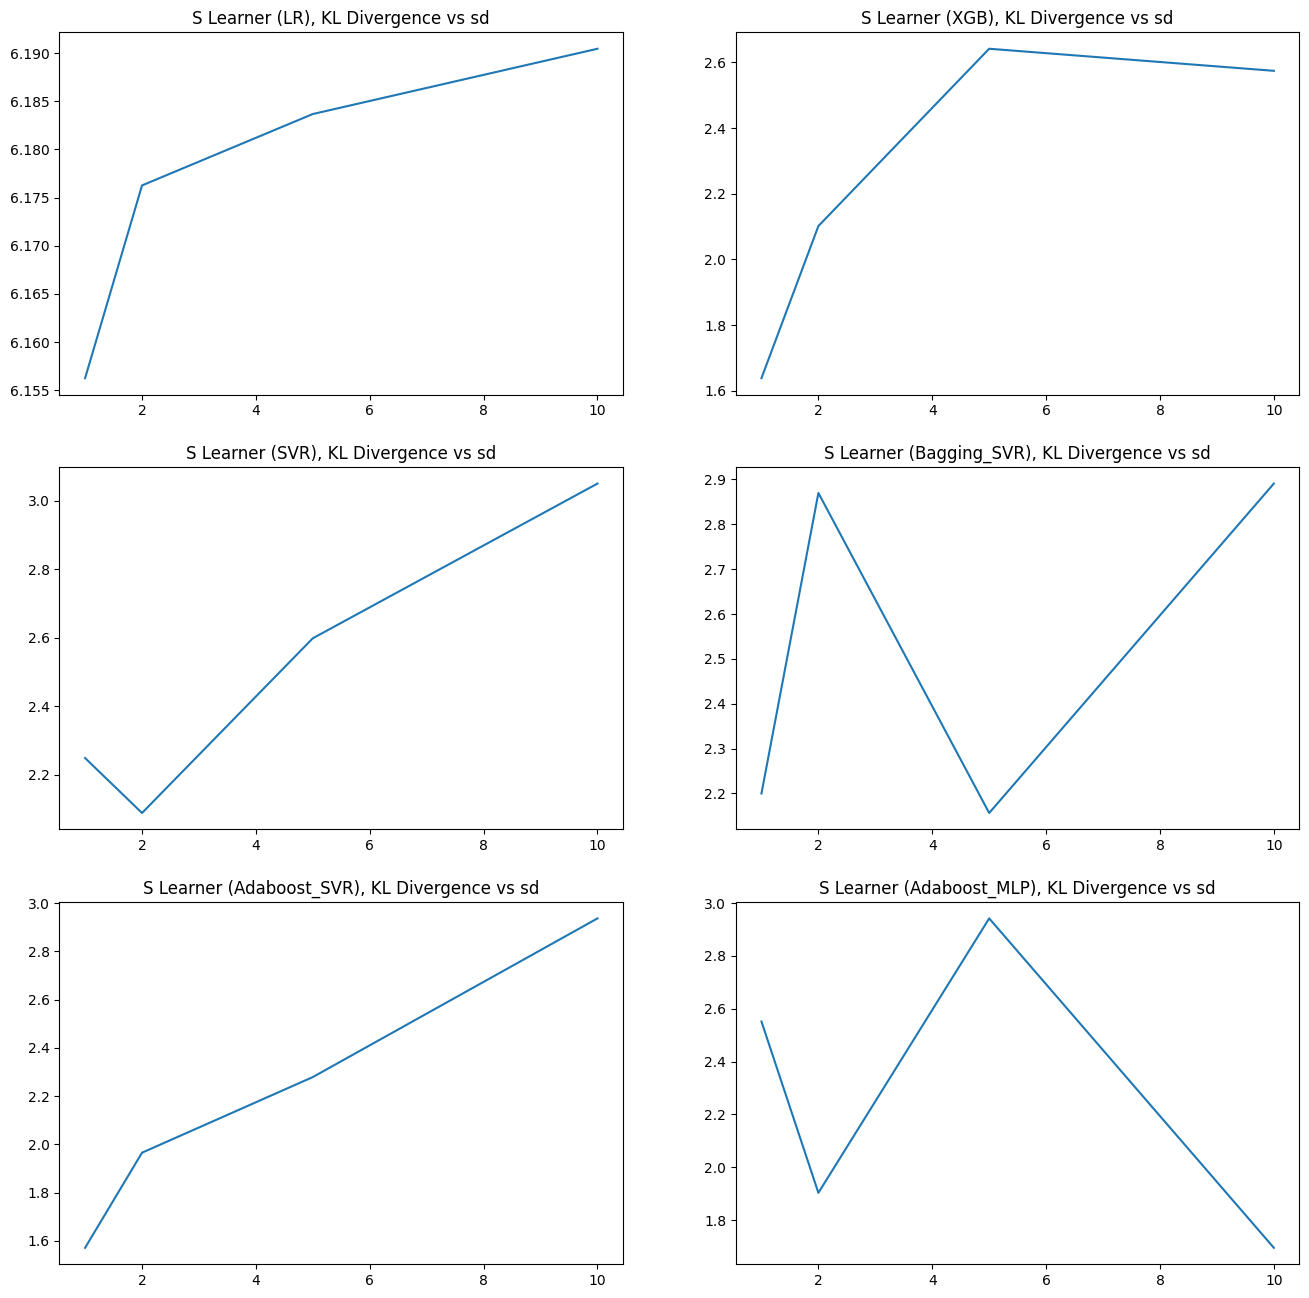

In [9]:
# cross section of model and n (trend across sd)
select_models = [s for s in models if "S Learner" in s]
subset_df = all_validation_summaries_df[
    (all_validation_summaries_df['model'].isin(select_models))
    & (all_validation_summaries_df['n'] == 200)
].copy()
plot_x = 'sd'
plot_y = 'KL Divergence'

nrows, ncols = 3,2
fig, axs = plt.subplots(nrows, ncols, figsize=(16,16))
curr_idx = 0
for i, model in enumerate(subset_df['model'].unique()):
    
    for j, n in enumerate(subset_df['n'].unique()):
        
        data_df = subset_df[
            (subset_df['model'] == model)
            & (subset_df['n'] == n)
        ].copy()
        
        axs[int(curr_idx/ncols), curr_idx%ncols].set_title(f'{model}, {plot_y} vs {plot_x}')
        axs[int(curr_idx/ncols), curr_idx%ncols].plot(
            data_df[plot_x],  # 'sd'
            data_df[plot_y],  # 'Abs % Error of ATE'
        )
        
        curr_idx += 1

# Predictions

In [10]:
import pickle

all_ns = [200, 500, 1000, 10000, 50000]
all_sds = [1, 2, 5, 10]

select_ns = [200]
select_sds = [1]

preds_pkls = {}
for n in all_ns:
    for sd in all_sds:
        
#         if n not in select_ns or sd not in select_sds:
#             continue
            
        filename = f'preds_dict_train_sd_n_{n}_sd_{sd}.pkl'
        with open(filename, 'rb') as handle:
            preds_pkl = pickle.load(handle)
            preds_pkls[f'n:{n}, sd:{sd}'] = preds_pkl

In [11]:
preds_pkls['n:200, sd:1']

{'Actuals': array([0.36909731, 0.2766684 , 0.64483298, 0.39345293, 0.80590165,
        0.55108872, 0.2595276 , 0.40560896, 0.3504881 , 0.75174939,
        0.52910999, 0.48605165, 0.42711835, 0.75457657, 0.28054087,
        0.50772697, 0.38610063, 0.45376568, 0.46834034, 0.90447474,
        0.06507001, 0.53822955, 0.30845224, 0.21160263, 0.41543556,
        0.29490793, 0.33136482, 0.22436468, 0.29065618, 0.50773159,
        0.43391215, 0.53962893, 0.91541675, 0.53417777, 0.56730568,
        0.42740367, 0.56850375, 0.62828609, 0.72929843, 0.31255561,
        0.79282328, 0.44233007, 0.11461886, 0.29247039, 0.51283852,
        0.45125775, 0.79122427, 0.57802409, 0.58169306, 0.58512836,
        0.16855743, 0.12679916, 0.28757258, 0.71202968, 0.57523754,
        0.64818272, 0.6778577 , 0.74453207, 0.32883693, 0.26477038,
        0.48261393, 0.58913286, 0.53878771, 0.71203361, 0.86699307,
        0.39279821, 0.56745818, 0.46836013, 0.75621732, 0.83411532,
        0.35483844, 0.46146711, 0.346

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# from sklearn.metrics import mean_squared_error as mse
# from sklearn.metrics import auc
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
from scipy.stats import entropy
import warnings
import pickle

# from causalml.inference.meta import (
#     BaseXRegressor,
#     BaseRRegressor,
#     BaseSRegressor,
#     BaseTRegressor,
# )
# from causalml.propensity import ElasticNetPropensityModel
# from causalml.dataset import simulate_nuisance_and_easy_treatment

# from MyRegressor import *
import os

plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

KEY_GENERATED_DATA = "generated_data"
KEY_ACTUAL = "Actuals"

RANDOM_SEED = 42
LOAD_DATA = False

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)


def distr_plot_single_sim(
    synthetic_preds,
    savepath,
    kind="kde",
    include_learners=[],
    bins=50,
    histtype="step",
    alpha=1,
    linewidth=1,
    bw_method=1,
):
    """Plots the distribution of each learner's predictions (for a single simulation).
    Kernel Density Estimation (kde) and actual histogram plots supported.
    Args:
        synthetic_preds (dict): dictionary of predictions generated by get_synthetic_preds()
        kind (str, optional): 'kde' or 'hist'
        drop_learners (list, optional): list of learners (str) to omit when plotting
        bins (int, optional): number of bins to plot if kind set to 'hist'
        histtype (str, optional): histogram type if kind set to 'hist'
        alpha (float, optional): alpha (transparency) for plotting
        linewidth (int, optional): line width for plotting
        bw_method (float, optional): parameter for kde
    """
    
    learners = include_learners
    preds_for_plot = {}
    for l in learners:
        preds_for_plot[l] = synthetic_preds[l]
    
    # deleted generated data and assign actual value
    del preds_for_plot[KEY_GENERATED_DATA]
    global_lower = np.percentile(np.hstack(preds_for_plot.values()), 1)
    global_upper = np.percentile(np.hstack(preds_for_plot.values()), 99)

    # Plotting
    plt.figure(figsize=(12, 8))
    cmap = get_cmap(len(learners))
    for i, (k, v) in enumerate(preds_for_plot.items()):
        if k in learners:
            if kind == "kde":
                v = pd.Series(v.flatten())
                v = v[v.between(global_lower, global_upper)]
                v.plot(
                    kind="kde",
                    bw_method=bw_method,
                    label=k,
                    linewidth=linewidth,
                    color=cmap(i),
                )
            elif kind == "hist":
                plt.hist(
                    v,
                    bins=np.linspace(global_lower, global_upper, bins),
                    label=k,
                    histtype=histtype,
                    alpha=alpha,
                    linewidth=linewidth,
                    color=cmap(i),
                )
            else:
                pass

    plt.xlim(global_lower, global_upper)
    #plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.legend()
    plt.title("Distribution from a Single Simulation")
    plt.savefig(savepath)

def plot_dist(dictionary, linear_models, save_path, alpha = 0.2, bins = 30):
    plt.figure(figsize=(12,8))
    keys = dictionary.keys()
    lin_models = linear_models
    not_lin_models = [key for key in keys if key not in linear_models]
    for k in not_lin_models:
        values = dictionary[k]
        plt.hist(values, alpha = alpha, bins = bins, label = k, range=[-0.5, 2])
    for k in lin_models:
        values = dictionary[k]
        plt.axvline(values[0], label=k,
           linestyle='dotted', color=np.random.rand(3,), linewidth=2)
    plt.title('Distribution of CATE Predictions by Meta Learner')
    plt.xlabel('Individual Treatment Effect (ITE/CATE)')
    plt.ylabel('# of Samples')
    plt.legend(fontsize=12)
    plt.savefig(save_path)

def scatter_plot_summary(synthetic_summary, savepath, k, drop_learners=[], drop_cols=[]):
    """Generates a scatter plot comparing learner performance. Each learner's performance is plotted as a point in the
    (Abs % Error of ATE, MSE) space.
    Args:
        synthetic_summary (pd.DataFrame): summary generated by get_synthetic_summary()
        k (int): number of simulations (used only for plot title text)
        drop_learners (list, optional): list of learners (str) to omit when plotting
        drop_cols (list, optional): list of metrics (str) to omit when plotting
    """
    plot_data = synthetic_summary.drop(drop_learners).drop(drop_cols, axis=1)

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    xs = plot_data["Abs % Error of ATE"]
    ys = plot_data["MSE"]

    ax.scatter(xs, ys)

    ylim = ax.get_ylim()
    xlim = ax.get_xlim()

    for i, txt in enumerate(plot_data.index):
        ax.annotate(
            txt,
            (
                xs[i] - np.random.binomial(1, 0.5) * xlim[1] * 0.04,
                ys[i] - ylim[1] * 0.03,
            ),
        )

    ax.set_xlabel("Abs % Error of ATE")
    ax.set_ylabel("MSE")
    ax.set_title("Learner Performance (averaged over k={} simulations)".format(k))
    plt.savefig(savepath)

def scatter_plot_summary_holdout(
    train_summary,
    validation_summary,
    k,
    savepath,
    label=["Train", "Validation"],
    drop_learners=[],
    drop_cols=[],
):
    """Generates a scatter plot comparing learner performance by training and validation.
    Args:
        train_summary (pd.DataFrame): summary for training synthetic data generated by get_synthetic_summary_holdout()
        validation_summary (pd.DataFrame): summary for validation synthetic data generated by
            get_synthetic_summary_holdout()
        label (string, optional): legend label for plot
        k (int): number of simulations (used only for plot title text)
        drop_learners (list, optional): list of learners (str) to omit when plotting
        drop_cols (list, optional): list of metrics (str) to omit when plotting
    """
    train_summary = train_summary.drop(drop_learners).drop(drop_cols, axis=1)
    validation_summary = validation_summary.drop(drop_learners).drop(drop_cols, axis=1)

    plot_data = pd.concat([train_summary, validation_summary])
    plot_data["label"] = [i.replace("Train", "") for i in plot_data.index]
    plot_data["label"] = [i.replace("Validation", "") for i in plot_data.label]

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    xs = plot_data["Abs % Error of ATE"]
    ys = plot_data["MSE"]
    group = np.array(
        [label[0]] * train_summary.shape[0] + [label[1]] * validation_summary.shape[0]
    )
    cdict = {label[0]: "red", label[1]: "blue"}

    for g in np.unique(group):
        ix = np.where(group == g)[0].tolist()
        ax.scatter(xs[ix], ys[ix], c=cdict[g], label=g, s=100)

    for i, txt in enumerate(plot_data.label[:10]):
        ax.annotate(txt, (xs[i] + 0.005, ys[i]))

    ax.set_xlabel("Abs % Error of ATE")
    ax.set_ylabel("MSE")
    ax.set_title("Learner Performance (averaged over k={} simulations)".format(k))
    ax.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
    plt.savefig(savepath)

def bar_plot_summary_holdout(
    train_summary, validation_summary, k, savepath, drop_learners=[], drop_cols=[]
):
    """Generates a bar plot comparing learner performance by training and validation
    Args:
        train_summary (pd.DataFrame): summary for training synthetic data generated by get_synthetic_summary_holdout()
        validation_summary (pd.DataFrame): summary for validation synthetic data generated by
            get_synthetic_summary_holdout()
        k (int): number of simulations (used only for plot title text)
        drop_learners (list, optional): list of learners (str) to omit when plotting
        drop_cols (list, optional): list of metrics (str) to omit when plotting
    """
    train_summary = train_summary.drop([KEY_ACTUAL])
    train_summary["Learner"] = train_summary.index

    validation_summary = validation_summary.drop([KEY_ACTUAL])
    validation_summary["Learner"] = validation_summary.index

    for metric in ["Abs % Error of ATE", "MSE", "KL Divergence"]:
        plot_data_sub = pd.DataFrame(train_summary.Learner).reset_index(drop=True)
        plot_data_sub["train"] = train_summary[metric].values
        plot_data_sub["validation"] = validation_summary[metric].values
        plot_data_sub = plot_data_sub.set_index("Learner")
        plot_data_sub = plot_data_sub.drop(drop_learners).drop(drop_cols, axis=1)
        plot_data_sub = plot_data_sub.sort_values("train", ascending=True)

        plot_data_sub.plot(kind="bar", color=["red", "blue"], figsize=(12, 8))
        plt.xticks(rotation=30)
        plt.title(
            "Learner Performance of {} (averaged over k={} simulations)".format(
                metric, k
            )
        )
        plt.savefig(savepath)


In [14]:
preds_pkls['n:200, sd:1']

{'Actuals': array([0.36909731, 0.2766684 , 0.64483298, 0.39345293, 0.80590165,
        0.55108872, 0.2595276 , 0.40560896, 0.3504881 , 0.75174939,
        0.52910999, 0.48605165, 0.42711835, 0.75457657, 0.28054087,
        0.50772697, 0.38610063, 0.45376568, 0.46834034, 0.90447474,
        0.06507001, 0.53822955, 0.30845224, 0.21160263, 0.41543556,
        0.29490793, 0.33136482, 0.22436468, 0.29065618, 0.50773159,
        0.43391215, 0.53962893, 0.91541675, 0.53417777, 0.56730568,
        0.42740367, 0.56850375, 0.62828609, 0.72929843, 0.31255561,
        0.79282328, 0.44233007, 0.11461886, 0.29247039, 0.51283852,
        0.45125775, 0.79122427, 0.57802409, 0.58169306, 0.58512836,
        0.16855743, 0.12679916, 0.28757258, 0.71202968, 0.57523754,
        0.64818272, 0.6778577 , 0.74453207, 0.32883693, 0.26477038,
        0.48261393, 0.58913286, 0.53878771, 0.71203361, 0.86699307,
        0.39279821, 0.56745818, 0.46836013, 0.75621732, 0.83411532,
        0.35483844, 0.46146711, 0.346

In [21]:
preds_dict_valid = preds_pkls['n:200, sd:1']
# include_learners = [s for s in preds_dict_valid.keys() if '(Adaboost_MLP)' in s and "S Learner" not in s]
include_learners = [s for s in preds_dict_valid.keys() if "T Learner" in s]
include_learners

['T Learner (LR)',
 'T Learner (XGB)',
 'T Learner (SVR)',
 'T Learner (Bagging_SVR)',
 'T Learner (Adaboost_SVR)',
 'T Learner (Adaboost_MLP)']

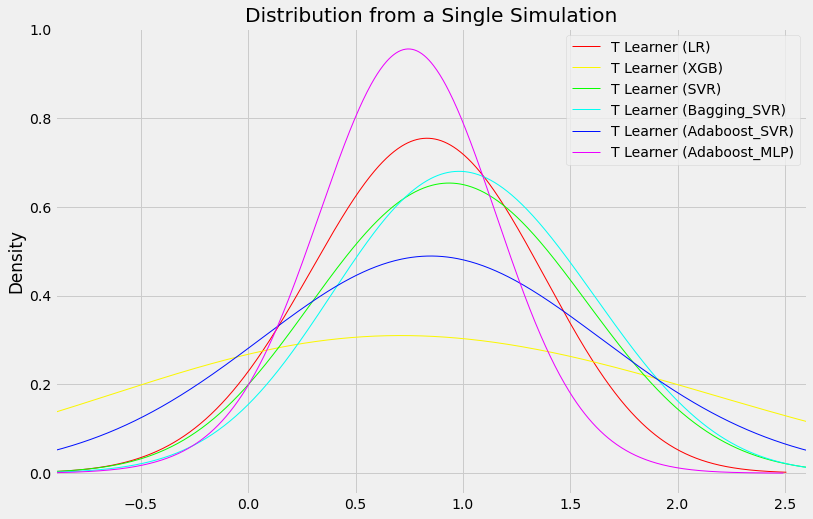

In [22]:
distr_plot_single_sim(
    synthetic_preds = preds_dict_valid,
    savepath = 'asdf.png',
    include_learners = include_learners + ['generated_data']
)